# Dog Breed Identification

## Install TensorFlow

In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import numpy as np

In [0]:
HEIGHT = 224
WIDTH = 224
NUM_CHANNELS = 3
BATCH_SIZE = 128

## Get list of Image Files Names and Associated Dog Breed

In [0]:
data_files = pd.read_csv("https://storage.googleapis.com/johnthas-dog-breeds/dog_breeds_labels.csv", header=0, error_bad_lines=False)

In [5]:
data_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


In [6]:
data_files.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
data_files['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
australian_terrier                102
blenheim_spaniel                  102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
siberian_husky                     95
whippet                            95
norwegian_elkhound                 95
pug         

In [0]:
dog_breeds = data_files['breed'].unique()

In [9]:
print(type(dog_breeds))

<class 'numpy.ndarray'>


In [10]:
print(dog_breeds)

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'airedale' 'leonberg' 'mexican_h

In [0]:
NCLASSES = len(dog_breeds)

In [12]:
print(np.where(dog_breeds == 'rottweiler')[0][0])

119


In [13]:
print(dog_breeds[119])

rottweiler


## Convert Dog Breeds to Numeric Representation

In [0]:
data_files['breed_id'] = data_files['breed'].apply(lambda x: np.where(dog_breeds == x)[0][0])

In [15]:
data_files.head()

,id,breed,breed_id
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,0
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,1
2,001cdf01b096e06d78e9e5112d419397,pekinese,2
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,3
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,4


## Specify File Paths

In [0]:
data_files['img'] = data_files['id'].apply(lambda x: 'gs://johnthas-dog-breeds/train/{}.jpg'.format(x))

In [17]:
data_files.head()

,id,breed,breed_id,img
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,0,gs://johnthas-dog-breeds/train/000bec180eb18c7...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,1,gs://johnthas-dog-breeds/train/001513dfcb2ffaf...
2,001cdf01b096e06d78e9e5112d419397,pekinese,2,gs://johnthas-dog-breeds/train/001cdf01b096e06...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,3,gs://johnthas-dog-breeds/train/00214f311d5d224...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,4,gs://johnthas-dog-breeds/train/0021f9ceb3235ef...


## Visualize

In [0]:
img = tf.io.read_file(data_files['img'][0])

In [19]:
print(type(img))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [20]:
print(img)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9

In [0]:
img = tf.image.decode_jpeg(img, channels=NUM_CHANNELS)

In [22]:
print(img)

tf.Tensor(
[[[107  45   0]
  [151  91  41]
  [177 119  69]
  ...
  [175 143  68]
  [189 157  82]
  [213 181 106]]

 [[150  92  46]
  [179 121  75]
  [164 110  63]
  ...
  [167 136  56]
  [171 140  60]
  [187 156  76]]

 [[150  97  55]
  [187 136  93]
  [161 112  69]
  ...
  [199 168  78]
  [193 162  72]
  [200 169  79]]

 ...

 [[188 121  66]
  [185 118  63]
  [182 117  63]
  ...
  [213 160 106]
  [211 158 104]
  [208 155 101]]

 [[185 118  63]
  [183 116  61]
  [182 117  63]
  ...
  [196 144  86]
  [199 147  90]
  [199 147  89]]

 [[181 114  59]
  [181 114  59]
  [181 116  62]
  ...
  [184 132  72]
  [189 137  79]
  [191 139  79]]], shape=(375, 500, 3), dtype=uint8)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

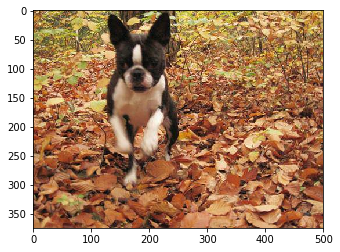

In [24]:
plt.imshow(img)

## Create Data Input Pipeline

In [25]:
train_file_list = data_files['img'].tolist()
print(type(train_file_list))

<class 'list'>


In [26]:
train_label_list = data_files['breed_id'].tolist()
print(type(train_label_list))

<class 'list'>


In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=NUM_CHANNELS)
  image = tf.image.resize(image, [HEIGHT, WIDTH])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(train_file_list)

In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_label_list, tf.int64))

In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [33]:
ds = image_label_ds.shuffle(buffer_size=1000 * BATCH_SIZE)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

## Define Model
[AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

In [37]:
model = models.Sequential([
    layers.Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(HEIGHT, WIDTH, NUM_CHANNELS), bias_initializer=tf.initializers.zeros(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu', bias_initializer=tf.initializers.ones(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.zeros(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.ones(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.ones(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.MaxPooling2D(),
    layers.Dense(4096, activation='relu', bias_initializer=tf.initializers.ones(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu', bias_initializer=tf.initializers.ones(), kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu', kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
    layers.Dense(NCLASSES, activation='softmax', bias_initializer=tf.initializers.ones())
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 23, 23, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 384)        

## Compile

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train

In [0]:
#model.fit(ds, epochs=1, steps_per_epoch=2)

## Implement Optimizer

In [0]:
optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.0005)